# Triển khai thuật toán KMeans

## Lý thuyết
Đầu vào :
- Tập dữ liệu $R=\{r_d :d\in D\}$ với $r_d \in \mathbb{R}^{|V|} $ là biểu diễn tf idf của d.
- Số cụm K.

Đầu ra:
- $A= \{a_d: d\in D\}$ với $a_d \in \{1,2,...,K\}$ cho biết $d$ được phân vào cụm nào.




In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# import numpy as np
# import random
# from collections import defaultdict

# class Member:
#   def __init__(self,r_d,label=None, doc_id= None):
#     self._r_d= r_d
#     self._label= label
#     self._doc_id= doc_id


# class Cluster:
#   def __init__(self):
#     self._centroid= None
#     self._member=[]

#   def reset_member(self):
#     self._member=[]
  
#   def add_member(self,mem):
#     self._member.append(mem)
      

In [0]:
# class Kmeans:
#   def __init__(self, num_clusters):
#     self._num_cluster= num_clusters
#     self._cluster= [Cluster() for i in range(self._num_cluster)]
#     self._E=[] # tập các cụm
#     self._S=0 # độ tương đồng

#   def load_data(self,path):
#     def sparse_to_dense(sparse_r_d, vocab_size):
#       '''hàm trích suất mảng các giá trị tf-idf'''
#       r_d= [0.0 for i in range(vocab_size)]
#       ind_tfidf= sparse_r_d.split()
#       for index_tfidf in ind_tfidf:
#         index= int(index_tfidf.split(":")[0])
#         tfidf=float(index_tfidf.split(':')[1])
#         r_d[index]= tfidf
#       return np.array(r_d)

#     with open(path) as f:
#       d_lines= f.read().splitlines()
#     with open('/content/drive/My Drive/Python code/DS_Lab/words_idfs.txt') as f:
#       vocab_size= len(f.read().splitlines())

#     self._data=[]
#     self._label_count=defaultdict(int)
#     for data_id, d in enumerate(d_lines):
#       features= d.split('<fff>')
#       label,doc_id= int(features[0]), int(features[1])
#       self._label_count[label] +=1
#       r_d= sparse_to_dense(sparse_r_d = features[2], vocab_size= vocab_size )
#       #r_d là mảng các giá trị của văn bản d
#       self._data.append(Member(r_d= r_d, label=label, doc_id= doc_id))
#       # tạo mảng data có các Member đại diện cho 1 văn bản.
  
  
#   def random_init(self, seed_value):
#     # chọn ra k điểm tâm ban đầu từ tập seed_value
#     centre_init= random.sample(seed_value, self._num_cluster)
#     for i in range(self._num_cluster):
#       #gán cho từng điểm thành tâm của 1 cụm
#       self._cluster[i].centroid= centre_init[i] 
    
  
#   def compute_purity(self):
#     majority_sum=0
#     for cluster in self._cluster:
#       member_labels= [member._label for member in cluster._member]
#       max_count= max([member_labels.count(label) for label in range(20)])
#       majority_sum+= max_count
#     return majority_sum* 1./len(self._data)

#   def compute_similarity(self, member, centroid):
#     return 1./(np.linalg.norm(centroid - member)+1)

  
#   def select_cluster_for(self,member):
#     # chọn tâm cụm cho từng member
#     best_fit_cluster=  None
#     max_similarity=-1
#     for cluster in self._cluster:
#       similarity= self.compute_similarity(member,cluster._centroid)
#       if similarity > max_similarity:
#         best_fir_cluster= cluster
#         max_similarity= similarity
#     best_fir_cluster.add_member(member)
#     return max_similarity

  
#   def update_centroid_of(self, cluster):
#     member_r_ds=[member._r_d for member in cluster._member]
#     aver_r_d= np.mean(member_r_ds, axis=0)
#     sqrt_sum_sqr=np.sqrt(np.sum(aver_r_d**2))
#     new_centroid= np.array([value/sqrt_sum_sqr for value in aver_r_d])
#     cluster._centroid= new_centroid


#   def stopping_codition(self,criterion, threshold):
#     crits= ['centroid','similarity','max_iter']
#     assert criterion in crits

#     if criterion == 'max_iter':
#     # trong trường hợp chọn tiêu chuẩn dừng là số lần lặp
#       if self._iteration >= threshold:
#         return True
#       else:
#         return False

#     elif criterion== 'centroid':
#       # chọn tiêu chuẩn dừng khi lượng cluster thay đổi nhở hơn ngưỡng
#       E_new= [list(cluster._centroid) for cluster in self._cluster]
#       E_new_minus_E= [centroid for centroid in E_new 
#                       if centroid not in self._E]
#       self._E= E_new
#       if len(E_new_minus_E) <= threshold:
#         return True
#       else:
#         return False
      
#     else:
#       # chọn tiêu chuẩn dừng khi độ lệch tương đồng (similarity) thay đổi
#       # nhỏ hơn 1 ngưỡng nào đó
#       self._new_S=0
#       for member in self._data:
#         max_s=self.select_cluster_for(member)
#         self._new_S += max_s
#       new_S_minus_S= self._new_S - self._S
#       self._S= self._new_S
#       if new_S_minus_S <= threshold:
#         return True
#       else:
#         return False


#   def run(self,seed_value, criterion, threshold):
#     #chọn các tâm cụm đầu
#     self.random_init(seed_value= seed_value)

#     # tiếp tục tiến hành cho đến khi hội tụ
#     self._iteration=0
#     while True:
#       #cập nhật lại các cluster;
#       for cluster in seslf._cluster:
#         cluster.reset_member()

#       self._new_S=0
#       for member in self._data:
#         # gán các điểm vào các cluster
#         max_s=self.select_cluster_for(member)
#         self._new_S += max_s

#       for cluster in self._cluster:
#         self.update_centroid_of(cluster)
      
#       self._iteration+=1
#       if self.stopping_codition(criterion, threshold):
#         break

#   #Đánh giá chất lượng phân cụm bằng NMI
#   def compute_NMI(self):
#     I_value, H_omega, H_C, N= 0.,0.,0.,len(self._data)
#     for cluster in self._cluster:
#       wk= len(cluster._member)* 1.
#       H_omega += -wk/N * np.log10(wk/N)
#       member_labels= [member._label for member in cluster._member]
#       for label in range(20):
#         wk_cj= member_labels.count(label)*1.
#         cj=self._label_count[label]
#         I_value += wk_cj/N * np.log10(N*wk_cj/(wk*cj) + 1e-12)
#     for label in range(20):
#       cj= self._label_count[label] *1.
#       H_C += -cj/N *np.log10(cj/N)
#     return I_value *2./(H_omega+ H_C)

## Thực hiện Kmeans



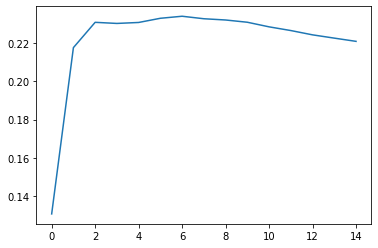

In [0]:
# -*- coding: utf-8 -*-

# from google.colab import drive
# drive.mount('/content/drive')

import numpy as np
import random
from collections import defaultdict


class Member:
    def __init__(self, r_d, label=None, doc_id=None):
        self._r_d = r_d
        self._label = label
        self._doc_id = doc_id


class Cluster:
    def __init__(self):
        self._centroid = None
        self._member = []

    def reset_member(self):
        self._member = []

    def add_member(self, mem):
        self._member.append(mem)


class Kmeans:
    def __init__(self, num_clusters):
        self._num_cluster = num_clusters
        self._cluster = [Cluster() for i in range(self._num_cluster)]
        self._E = []  # tập các cụm
        self._S = 0  # độ tương đồng

    def load_data(self, path):
        def sparse_to_dense(sparse_r_d, vocab_size):
            '''hàm trích suất mảng các giá trị tf-idf'''
            r_d = [0.0 for i in range(vocab_size)]
            ind_tfidf = sparse_r_d.split()
            for index_tfidf in ind_tfidf:
                index = int(index_tfidf.split(":")[0])
                tfidf = float(index_tfidf.split(':')[1])
                r_d[index] = tfidf
            return np.array(r_d)

        with open(path) as f:
            d_lines = f.read().splitlines()
        with open('/content/drive/My Drive/Python code/DS_Lab/words-idfs.txt') as f:
            vocab_size = len(f.read().splitlines())

        self._data = []
        self._label_count = defaultdict(int)
        x=[]
        label_data=[]
        for data_id, d in enumerate(d_lines):
            features = d.split('<fff>')
            label, doc_id = int(features[0]), int(features[1])
            self._label_count[label] += 1
            r_d = sparse_to_dense(sparse_r_d=features[2], vocab_size=vocab_size)
            # r_d là mảng các giá trị của văn bản d
            self._data.append(Member(r_d=r_d, label=label, doc_id=doc_id))
            
            x.append(r_d)
            label_data.append(label)
        return (x, label_data)
            # tạo mảng data có các Member đại diện cho 1 văn bản.

    def random_init(self, seed_value):
        # chọn ra k điểm tâm ban đầu từ tập seed_value
        centre_init = random.sample(seed_value, self._num_cluster)
        for i in range(self._num_cluster):
            # gán cho từng điểm thành tâm của 1 cụm
            self._cluster[i]._centroid = centre_init[i]

    def random_init2(self):
        X= np.array(self._data)
        k= self._num_cluster
        cluster_init= X[np.random.choice(X.shape[0], k, replace=False)]
        # print(type(cluster_init[0]))
        for i in range(self._num_cluster):
            self._cluster[i]._centroid = cluster_init[i]


    def compute_purity(self):
        majority_sum = 0
        for cluster in self._cluster:
            member_labels = [member._label for member in cluster._member]
            max_count = max([member_labels.count(label) for label in range(20)])
            majority_sum += max_count
        return majority_sum * 1. / len(self._data)

    def compute_similarity(self, member, centroid):
        # print(type(member))
        # print(type(centroid))
        a= member._r_d
        b= centroid._r_d
        return 1. / (np.linalg.norm(a - b) + 1)

    def select_cluster_for(self, member):
        # chọn tâm cụm cho từng member
        best_fit_cluster = None
        max_similarity = -1
        for cluster in self._cluster:
            similarity = self.compute_similarity(member, cluster._centroid)
            if similarity > max_similarity:
                best_fit_cluster = cluster
                max_similarity = similarity
        best_fit_cluster.add_member(member)
        return max_similarity

    def update_centroid_of(self, cluster):
        member_r_ds = [member._r_d for member in cluster._member]
        aver_r_d = np.mean(member_r_ds, axis=0)
        sqrt_sum_sqr = np.sqrt(np.sum(aver_r_d ** 2))
        new_centroid_r_d = np.array([value / sqrt_sum_sqr for value in aver_r_d])
        new_centroid=Member(new_centroid_r_d, label=cluster._centroid._label, doc_id=cluster._centroid._doc_id )
        cluster._centroid = new_centroid

    def stopping_codition(self, criterion, threshold):
        crits = ['centroid', 'similarity', 'max_iter']
        assert criterion in crits

        if criterion == 'max_iter':
            # trong trường hợp chọn tiêu chuẩn dừng là số lần lặp
            if self._iteration >= threshold:
                return True
            else:
                return False

        elif criterion == 'centroid':
            # chọn tiêu chuẩn dừng khi lượng cluster thay đổi nhở hơn ngưỡng
            E_new = [list(cluster._centroid) for cluster in self._cluster]
            E_new_minus_E = [centroid for centroid in E_new
                             if centroid not in self._E]
            self._E = E_new
            if len(E_new_minus_E) <= threshold:
                return True
            else:
                return False

        else:
            # chọn tiêu chuẩn dừng khi độ lệch tương đồng (similarity) thay đổi
            # nhỏ hơn 1 ngưỡng nào đó
            self._new_S = 0
            for member in self._data:
                max_s = self.select_cluster_for(member)
                self._new_S += max_s
            new_S_minus_S = self._new_S - self._S
            self._S = self._new_S
            if new_S_minus_S <= threshold:
                return True
            else:
                return False

    # def run(self, seed_value, criterion, threshold):
    def run(self, criterion, threshold):
        # chọn các tâm cụm đầu
        # self.random_init(seed_value=seed_value)
        self.random_init2()

        # tiếp tục tiến hành cho đến khi hội tụ
        self._iteration = 0
        NMI_score=[]
        while True:
            # cập nhật lại các cluster;
            for cluster in self._cluster:
                cluster.reset_member()

            self._new_S = 0
            for member in self._data:
                # gán các điểm vào các cluster
                max_s = self.select_cluster_for(member)
                self._new_S += max_s

            for cluster in self._cluster:
                self.update_centroid_of(cluster)

            NMI_score.append(self.compute_NMI())
            self._iteration += 1
            if self.stopping_codition(criterion, threshold):
                return np.array(NMI_score)

    # Đánh giá chất lượng phân cụm bằng NMI
    def compute_NMI(self):
        I_value, H_omega, H_C, N = 0., 0., 0., len(self._data)
        for cluster in self._cluster:
            wk = len(cluster._member) * 1.
            H_omega += -wk / N * np.log10(wk / N)
            member_labels = [member._label for member in cluster._member]
            for label in range(20):
                wk_cj = member_labels.count(label) * 1.
                cj = self._label_count[label]
                I_value += wk_cj / N * np.log10(N * wk_cj / (wk * cj) + 1e-12)
        for label in range(20):
            cj = self._label_count[label] * 1.
            H_C += -cj / N * np.log10(cj / N)
        return I_value * 2. / (H_omega + H_C)


"""## Thực hiện Kmeans """

# with open('./20news_bydate/words_idfs.txt') as f:
#     vocab_size = len(f.read().splitlines())
# print(vocab_size)

k_means= Kmeans(20)
k_means.load_data("/content/drive/My Drive/Python code/DS_Lab/full_tf_idf.txt")

iteration=np.arange(15)
NMI_score=k_means.run("max_iter",15)


import matplotlib.pyplot as plt
plt.plot(iteration, NMI_score)
plt.show()


In [6]:
!pip install scipy

## Thực hiện KMeans với Sklearn

In [9]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix

def load_data( path):
  def sparse_to_dense(sparse_r_d, vocab_size):
    '''hàm trích suất mảng các giá trị tf-idf'''
    r_d = [0.0 for i in range(vocab_size)]
    ind_tfidf = sparse_r_d.split()
    for index_tfidf in ind_tfidf:
                index = int(index_tfidf.split(":")[0])
                tfidf = float(index_tfidf.split(':')[1])
                r_d[index] = tfidf
    return np.array(r_d)

  with open(path) as f:
    d_lines = f.read().splitlines()
  with open('/content/drive/My Drive/Python code/DS_Lab/words-idfs.txt') as f:
    vocab_size = len(f.read().splitlines())

  # self._data = []
  # self._label_count = defaultdict(int)
  x=[]
  label_data=[]
  for data_id, d in enumerate(d_lines):
    features = d.split('<fff>')
    label, doc_id = int(features[0]), int(features[1])
    # self._label_count[label] += 1
    r_d = sparse_to_dense(sparse_r_d=features[2], vocab_size=vocab_size)
    # r_d là mảng các giá trị của văn bản d
    # self._data.append(Member(r_d=r_d, label=label, doc_id=doc_id))
            
    x.append(r_d)
    label_data.append(label)
  return x, label_data
            # tạo mảng data có các Member đại diện cho 1 văn bản.

def clustering_with_KMeans():
  
  data, label=load_data("/content/drive/My Drive/Python code/DS_Lab/full_tf_idf.txt")
  x= csr_matrix(data)
  print("==================")
  kmeans= KMeans(
      n_clusters=20,
      init='random',
      n_init= 5,
      tol=1e-3,
      random_state= 2020
  ).fit(x)
  labels= kmeans.labels_
  print(labels)
  
clustering_with_KMeans()

[17 17 18 ...  0 18  0]
